In [1]:
from util.website import Website
from os.path import join
from os import listdir
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

# Path of any given Website dump
DATA_PATH = "./data/astronomy.stackexchange.com"

# Creating a Website Object (check utils package)
website = Website(DATA_PATH)

In [2]:
percent_missing = website.Posts.isnull().sum() * 100 / len(website.Posts)
missing_value_df = pd.DataFrame({'missing': percent_missing})
missing_value_df
# Displaying the % of missing values in Posts table

missing
Id                 0.000000
PostTypeId         0.000000
AcceptedAnswerId  79.509800
CreationDate       0.000000
Score              0.000000
ViewCount         59.763722
Body               0.000000
OwnerUserId        2.888267
LastEditorUserId  53.618964
LastEditDate      51.850715
LastActivityDate   0.000000
CommentCount       0.000000
ContentLicense     0.000000

In [3]:
percent_missing = website.Users.isnull().sum() * 100 / len(website.Users)
missing_value_df = pd.DataFrame({'missing': percent_missing})
missing_value_df
# Displaying the % of missing values in Users table

missing
Id                 0.000000
Reputation         0.000000
CreationDate       0.000000
DisplayName        0.000000
LastAccessDate     0.000000
WebsiteUrl        77.806572
Location          61.429651
AboutMe           63.175323
Views              0.000000
Upvotes          100.000000
DownVotes          0.000000
ProfileImageUrl   14.123745
AccountId          0.000000

In [4]:
percent_missing = website.Comments.isnull().sum() * 100 / len(website.Comments)
missing_value_df = pd.DataFrame({'missing': percent_missing})
missing_value_df
# Displaying the % of missing values in Comments table

missing
Id              0.000000
PostId          0.000000
Score           0.000000
CreationDate    0.000000
Text            0.000000
UserId          4.136185
ContentLicense  0.000000

In [5]:
percent_missing = website.PostHistory.isnull().sum() * 100 / len(website.PostHistory)
missing_value_df = pd.DataFrame({'missing': percent_missing})
missing_value_df
# Displaying the % of missing values in PostHistory table

missing
Id                  0.000000
PostHistoryTypeId   0.000000
PostId              0.000000
RevisionGUID        0.000000
CreationDate        0.000000
Comment            58.920466
UserId             12.628894
Text               12.440868
ContentLicense     11.081570

In [6]:
percent_missing = website.Votes.isnull().sum() * 100 / len(website.Votes)
missing_value_df = pd.DataFrame({'missing': percent_missing})
missing_value_df
# Displaying the % of missing values in Votes table

missing
Id             0.000000
PostId         0.000000
VoteTypeId     0.000000
CreationDate   0.000000
UserId        96.801694
BountyAmount  99.732587

In [7]:
percent_missing = website.PostLinks.isnull().sum() * 100 / len(website.PostLinks)
missing_value_df = pd.DataFrame({'missing': percent_missing})
missing_value_df
# Displaying the % of missing values in PostLinks table

missing
Id                 0.0
CreationDate       0.0
PostId             0.0
RelatedPostId      0.0
LinkTypeId         0.0

In [8]:
percent_missing = website.Tags.isnull().sum() * 100 / len(website.Tags)
missing_value_df = pd.DataFrame({'missing': percent_missing})
missing_value_df
# Displaying the % of missing values in Tags table

missing
Id              0.000000
TagName         0.000000
Count           0.000000
ExcerptPostId  25.793651
WikiPostId     25.793651

In [9]:
percent_missing = website.Badges.isnull().sum() * 100 / len(website.Badges)
missing_value_df = pd.DataFrame({'missing': percent_missing})
missing_value_df
# Displaying the % of missing values in Badges table

missing
Id            0.0
UserId        0.0
Name          0.0
Date          0.0
Class         0.0
TagBased      0.0

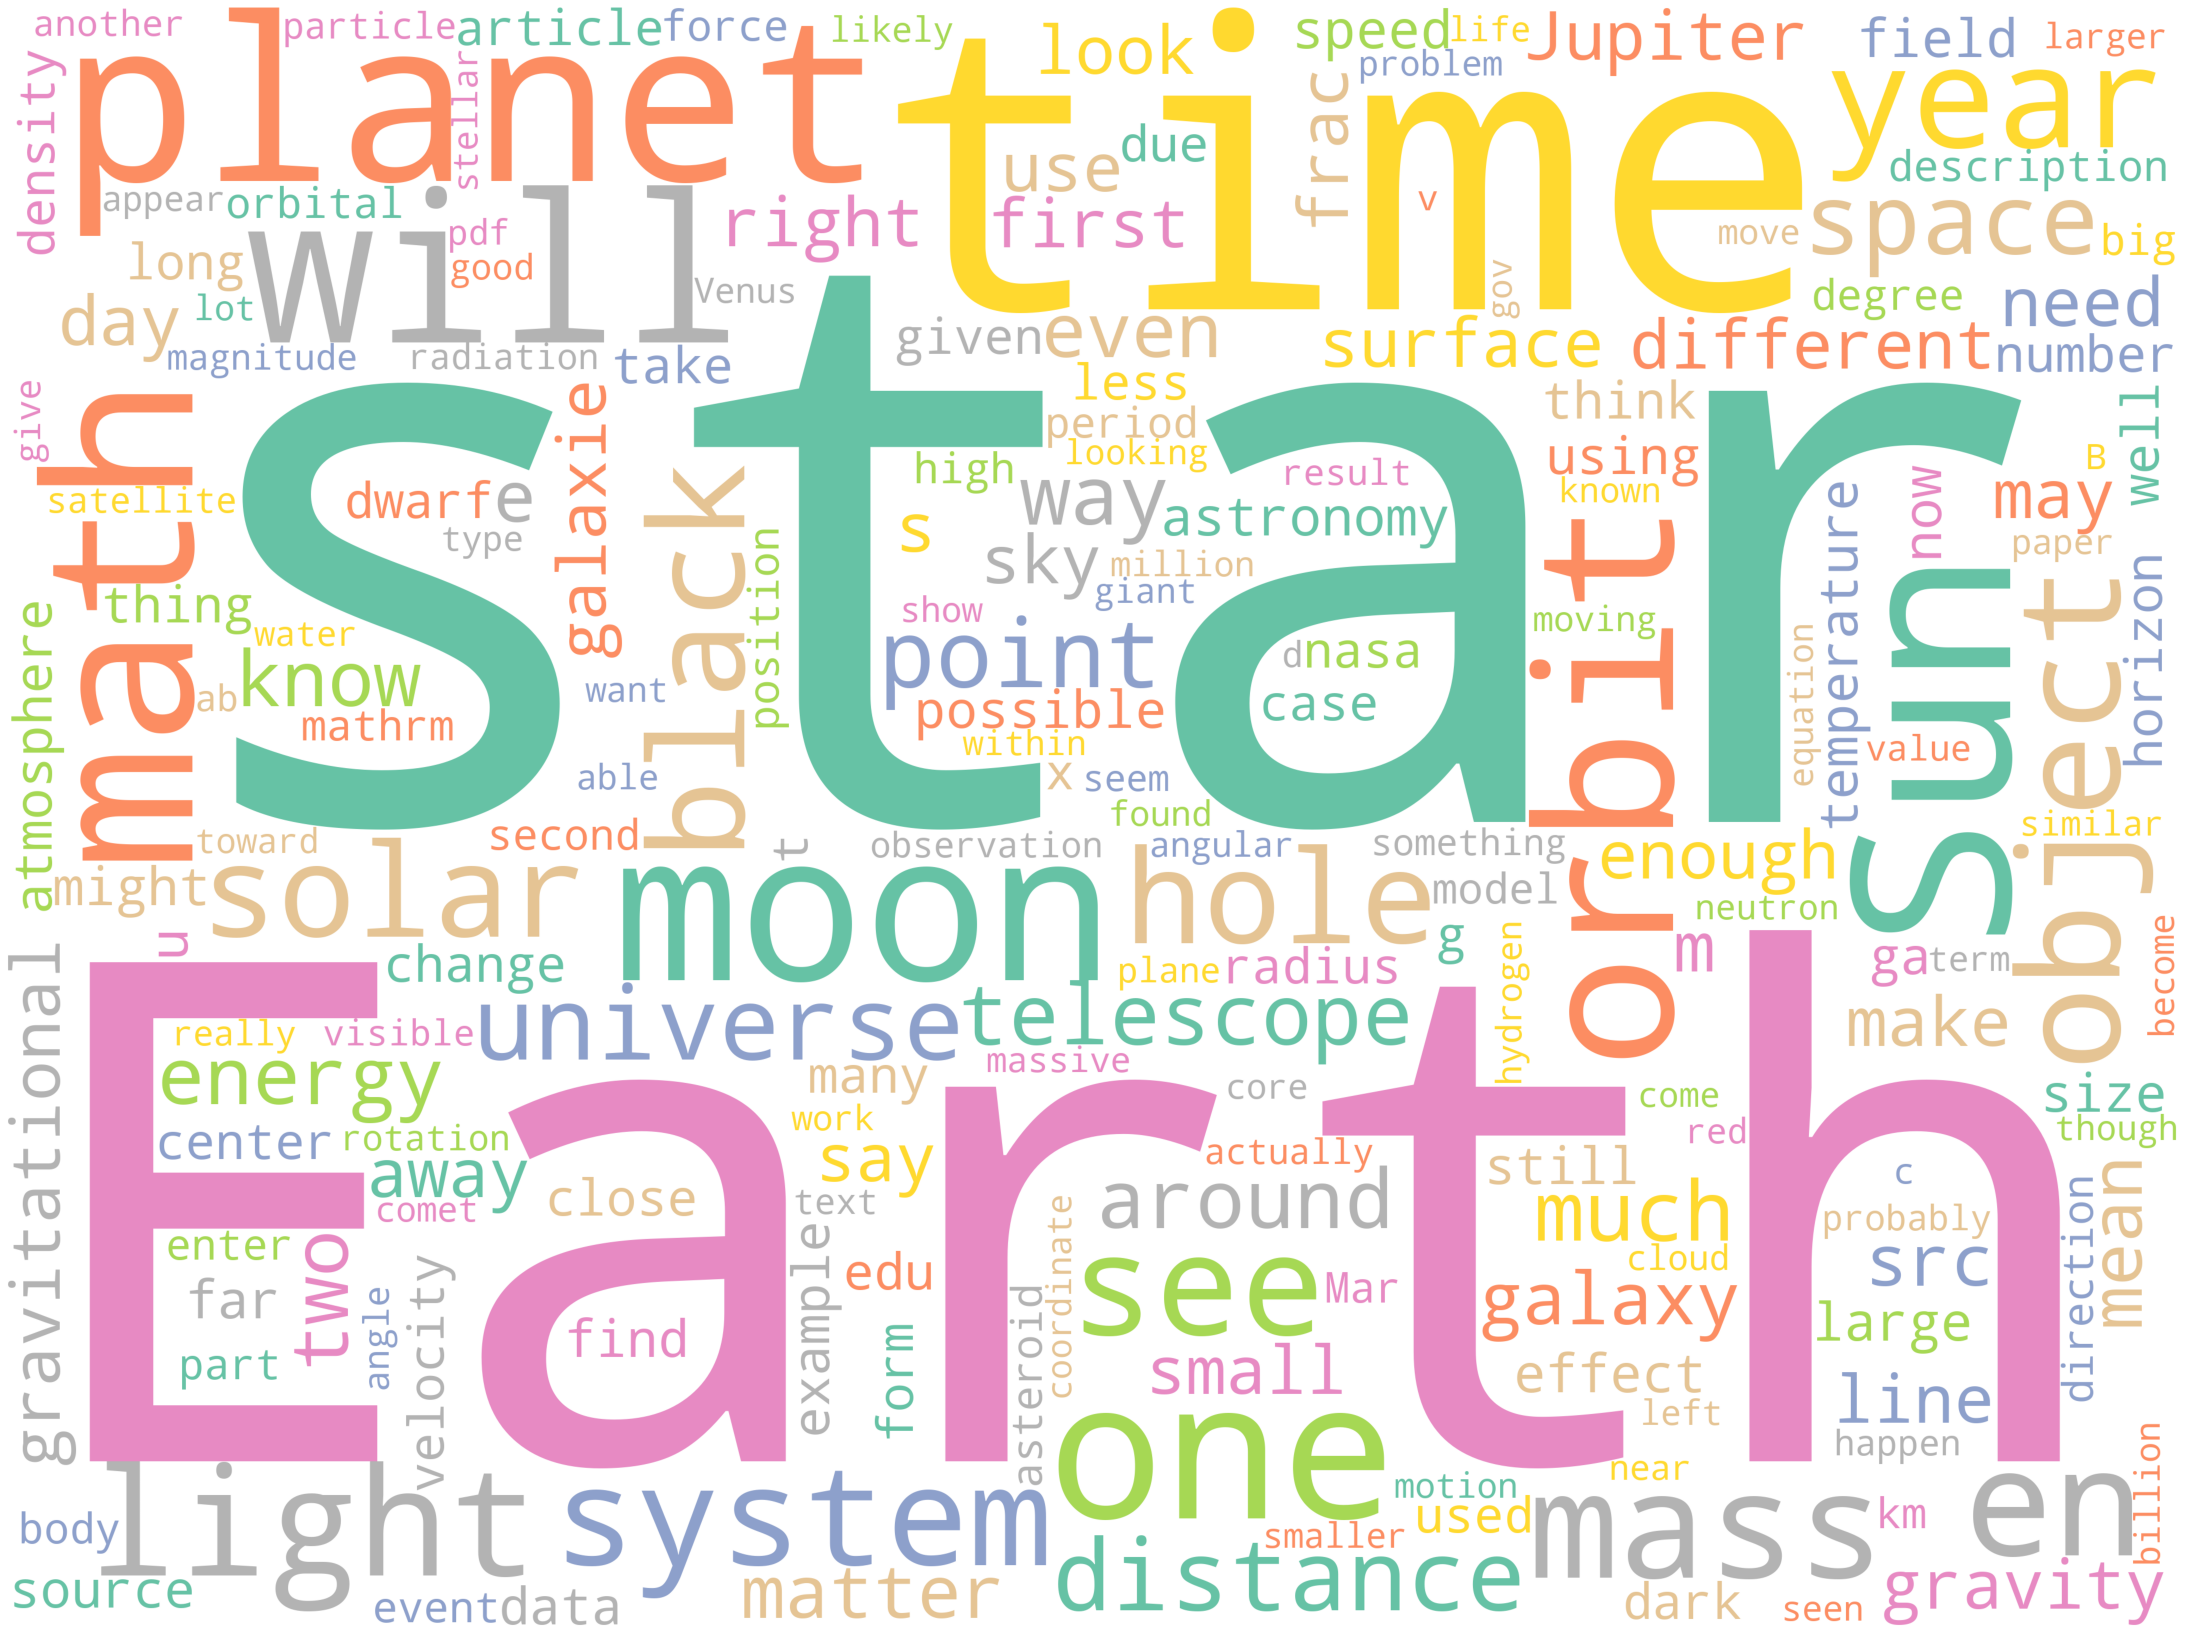

In [10]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off")
    plt.show()

# Merge all the contents of the Posts Body
text = ''.join(website.Posts['Body'])

# Adding stop words to remove all text formatting symbols and redundant words
stop_words = ["https", "ul", ".", "org", "wiki", "wikipedia", "image", "code", "span", "container", "imgur", "html", "jpg", "png", "jpeg", "nofollow", "quot",  "comment", "site", "SE", "tags", "comments", "moderators", "answers", "posts", "stackoverflow", "amp", "strike", "chat", "edit", "alt", "link", "exchange", "help", "votes", "noreferrer", "closed", "png", "h1", "new", "stackexchange", "class","users","questions", "topic", "meta", "stack", "href", "tag", "p", "em", "rel", "li", "user", "answer", "title", "h3", "moderator", "post", "vote", "blockquote", "strong","tagged","question", "img", "page"] + list(STOPWORDS)


# Generate word cloud
wordcloud = WordCloud(
    width=4000,
    height=3000,
    random_state=1,
    background_color="white",
    colormap="Set2",
    collocations=False,
    stopwords=stop_words,
).generate(text)

# Plot
plot_cloud(wordcloud)

In [28]:
website.Users['Location']
# Some of the Locations are denoted aas NaN, let's check what % of users are we going to represent in the following analysis

0                      on the server farm
1                            New York, NY
2                                     NaN
3                             Netherlands
4                                     NaN
                       ...               
13687    Holly Springs, GA, United States
13688                                 NaN
13689                                 NaN
13690                                 NaN
13691                          London, UK
Name: Location, Length: 13692, dtype: object

In [17]:
print(f"The percentage of users with available Locations is {round((1-website.Users['Location'].isna().sum()/website.Users.shape[0])*100, 2)}%")

The percentage of users with available Locations is 55.05%


In [22]:
# Here we will fetch the geolocations of the users to represent their distribution on the map
from geopy.geocoders import Nominatim
import time

# Defining a user agent for the API
geolocator = Nominatim(user_agent="Pierog")

from geopy.extra.rate_limiter import RateLimiter
# Creating a rate limiter to handle the following bulk operation
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
exceptions = 0

def eval_result(x):
    try:
        return x
    except:
        exceptions +=1
        pass

# For every Location in the Users table row that is not NaN, get the geolocation
geo_points = website.Users['Location'][website.Users['Location'].notna()].apply(geocode, timeout = 100).apply(lambda x: eval_result(x))

In [25]:
# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for point in geo_points:
        if point :
            radius=5
            folium.CircleMarker(location = [point.latitude, point.longitude], radius=radius, fill =True).add_to(marker_cluster)
#show the map
world_map

In [20]:
website.Posts['CreationDate']

0        2016-04-19T20:11:37.597
1        2016-04-19T20:13:08.790
2        2016-04-19T20:20:24.960
3        2016-04-19T20:20:28.600
4        2016-04-19T20:20:28.600
                  ...           
14138    2020-12-05T20:13:18.960
14139    2020-12-05T20:31:12.560
14140    2020-12-06T00:50:47.207
14141    2020-12-06T01:10:49.087
14142    2020-12-06T02:06:52.037
Name: CreationDate, Length: 14143, dtype: object

In [12]:
creation_dates = website.Posts['CreationDate'].astype("datetime64")
# getting the creation dates of Posts as yyyy-mm-dd
creation_dates

0       2013-09-24 18:51:54.593
1       2013-09-24 18:53:25.647
2       2013-09-24 18:54:53.473
3       2013-09-24 18:57:01.680
4       2013-09-24 18:57:01.680
                  ...          
26066   2021-02-27 23:14:03.817
26067   2021-02-27 23:55:01.793
26068   2021-02-28 02:17:04.393
26069   2021-02-28 03:11:10.243
26070   2021-02-28 03:11:15.563
Name: CreationDate, Length: 26071, dtype: datetime64[ns]

<AxesSubplot:xlabel='CreationDate'>

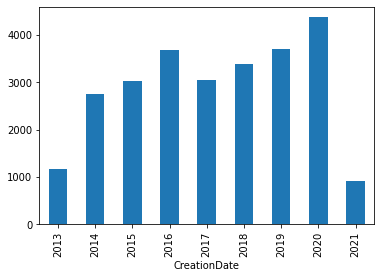

In [13]:
creation_dates.groupby(creation_dates.dt.year).count().plot(kind="bar")
# plotting the number of posts per year, as you can see the number of posts is increasing throughout the years

<AxesSubplot:xlabel='CreationDate'>

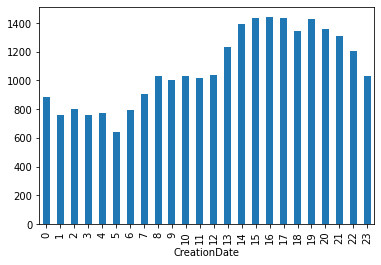

In [14]:
creation_dates.groupby(creation_dates.dt.hour).count().plot(kind="bar")
# showing the most active hours for posting

In [15]:
top_posts = website.Posts.sort_values(by = 'Score', ascending = False)
top_posts['Body'][:10]
# showing the top 10 scored posts

14346    <p>Pluto is something like magnitude 14. The l...
20010    <p>Firstly, Mars has a mean distance from the ...
13946    <p>Impacting solar system objects would have r...
19286    <p>Would it be possible to put a satellite int...
10637    <p>It takes one year for the earth to go aroun...
13061    <p>If you're not limited to the visible spectr...
13055    <p><a href="https://en.wikipedia.org/wiki/File...
21906    <p>Hi I'm a highschool student studying astron...
420      <p>I've been trying to wrap my head around cap...
10650    <p>Does the earth's orbital plane change with ...
Name: Body, dtype: object